<a href="https://colab.research.google.com/github/lydia-r/Data-110/blob/main/Final%20Project/Untitled22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install squarify
import squarify

In [3]:
housedata= pd.read_csv("https://raw.githubusercontent.com/lydia-r/Data-110/refs/heads/main/Final%20Project/household_debt.csv")


In [9]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Period        64 non-null     object 
 1   Mortgage      64 non-null     float64
 2   HE Revolving  64 non-null     float64
 3   Auto Loan     64 non-null     float64
 4   Credit Card   64 non-null     float64
 5   Student Loan  64 non-null     float64
 6   Other         64 non-null     float64
 7   Total         64 non-null     float64
dtypes: float64(7), object(1)
memory usage: 4.1+ KB


In [11]:
housedata.describe()

,Mortgage,HE Revolving,Auto Loan,Credit Card,Student Loan,Other,Total
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,8.041250,0.538750,0.866406,0.742969,0.823438,0.378125,11.390313
std,1.094947,0.117467,0.180083,0.061970,0.378980,0.047069,1.533281
min,4.940000,0.240000,0.620000,0.660000,0.240000,0.300000,7.230000
25%,7.922500,0.470000,0.737500,0.690000,0.502500,0.337500,11.210000
50%,8.265000,0.540000,0.805000,0.730000,0.825000,0.385000,11.740000
75%,8.762500,0.630000,0.962500,0.800000,1.167500,0.410000,12.355000
max,9.290000,0.710000,1.270000,0.870000,1.460000,0.490000,13.540000


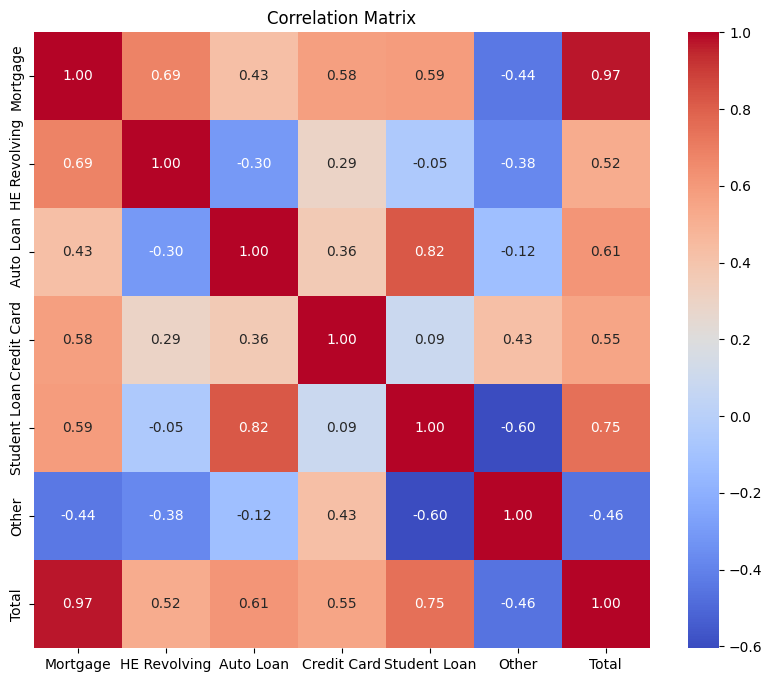

In [12]:
# we use correlation Heatmap to show alternative way of seeing how those feature relate

plt.figure(figsize=(10, 8))
correlation =housedata [['Mortgage', 'HE Revolving', 'Auto Loan', 'Credit Card', 'Student Loan', 'Other', 'Total']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

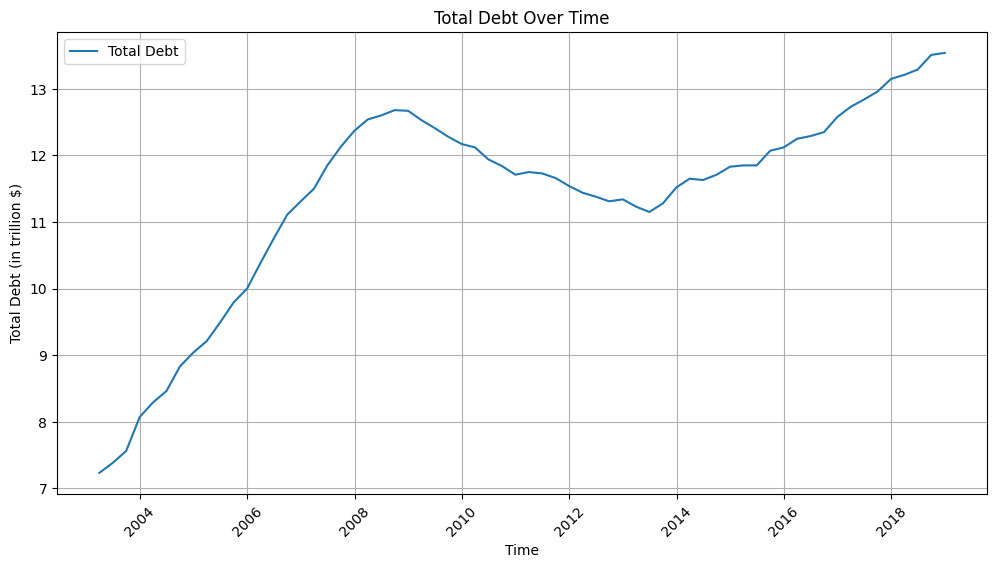

In [16]:
# Convert 'Period' to a datetime-like object for better analysis
housedata['Year'] = housedata['Period'].str.split(':').str[0].astype(int) + 2000
housedata['Quarter'] = housedata['Period'].str.split(':').str[1]
housedata['Time'] = pd.to_datetime(housedata['Year'].astype(str) + housedata['Quarter'].replace({
    'Q1': '-03-31', 'Q2': '-06-30', 'Q3': '-09-30', 'Q4': '-12-31'
}))

# Set 'Time' as index for time series analysis
housedata.set_index('Time', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=housedata, x=housedata.index, y='Total', label='Total Debt')
plt.title('Total Debt Over Time')
plt.xlabel('Time')
plt.ylabel('Total Debt (in trillion $)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

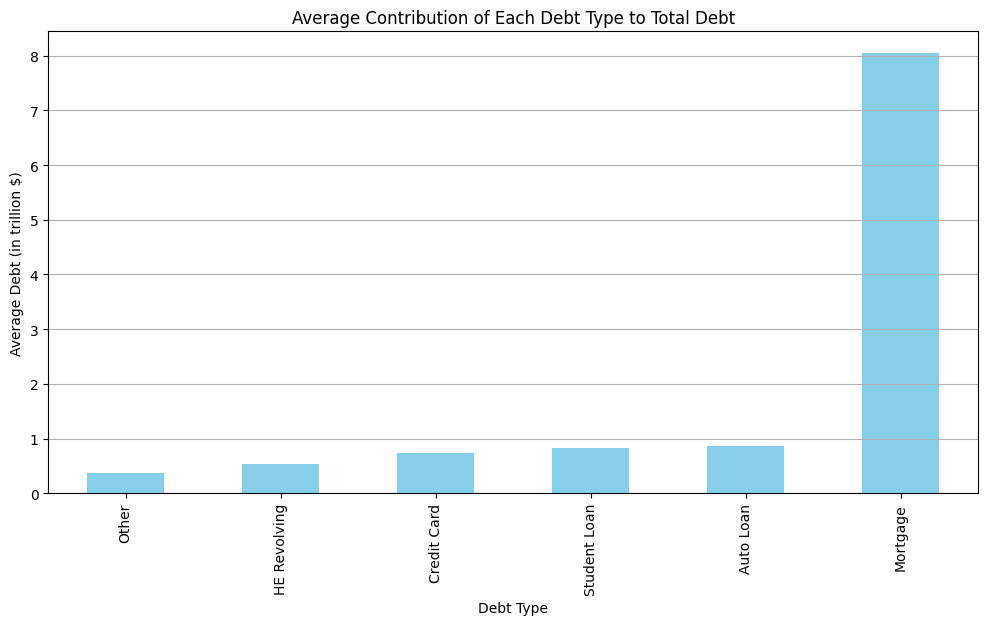

In [20]:
debt_types= ['Mortgage','HE Revolving', 'Auto Loan', 'Credit Card', 'Student Loan', 'Other']
average_contributions = housedata[debt_types].mean()
plt.figure(figsize=(12, 6))
average_contributions.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Contribution of Each Debt Type to Total Debt')
plt.ylabel('Average Debt (in trillion $)')
plt.xlabel('Debt Type')
plt.grid(axis='y')
plt.show()

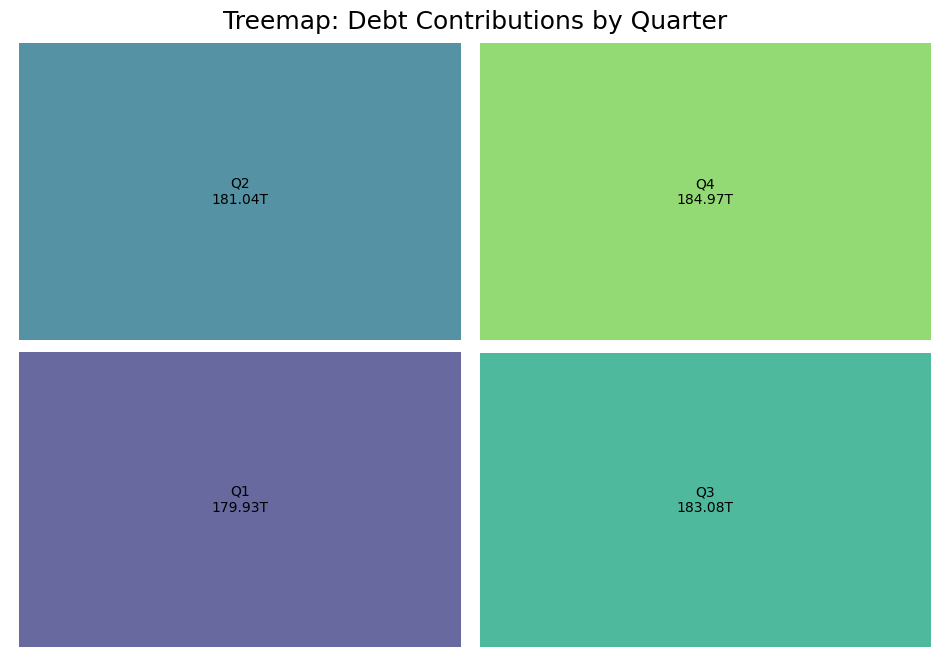

In [16]:
housedata['Quarter'] = housedata['Period'].str[-2:]  # Assuming 'Period' contains Quarter information (e.g., '03:Q1')

# Summing contributions for each quarter
quarterly_aggregated = housedata.groupby('Quarter')[['Mortgage', 'HE Revolving', 'Auto Loan', 'Credit Card', 'Student Loan', 'Other']].sum()

# Summing total debt across all categories for each quarter
sizes_quarters = quarterly_aggregated.sum(axis=1)
labels_quarters = [f"{quarter}\n{value:.2f}T" for quarter, value in zip(quarterly_aggregated.index, sizes_quarters)]

# Visualization: Treemap for Quarterly Debt Contributions
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes_quarters, label=labels_quarters, alpha=0.8, color=sns.color_palette("viridis", len(sizes_quarters)), pad= True)
plt.title('Treemap: Debt Contributions by Quarter', fontsize=18)
plt.axis('off')  # Clean axes for a treemap
plt.show()